# 📚 ChatGPT로 도서관 데이터베이스에 질문하고 결과까지 출력하기 (전체 흐름)

---

## 🧠 전체 흐름 이해하기

이 코드는 다음과 같은 목표를 가지고 있습니다:

### ✅ 자연어 질문 → ChatGPT가 SQL로 변환 → 데이터베이스에서 실행 → 실제 결과 출력

---

## 🧩 전체 과정 한눈에 보기

1. 📁 **도서관 데이터 정리 (SQLite로 DB 구성)**  
2. 🤖 **AI(ChatGPT) 연결 – 자연어를 SQL로 바꾸는 역할**  
3. 🔗 **LangChain 사용 – AI와 DB를 연결하는 도구**  
4. 🎤 **질문 전달 – 예: "Bob은 어떤 책을 빌렸나요?"**  
5. 🧠 **ChatGPT가 SQL 생성 – 자동으로 쿼리 작성**  
6. 🧾 **SQLite에서 실행하고 결과 출력 ← 이 단계 포함됨!**

---

## 🧱 1단계: 데이터베이스 준비

- SQLite를 사용하여 도서관 정보를 저장합니다.
- 책, 회원, 대여 기록용으로 **3개의 테이블**을 만듭니다:
  - `books`: 책 정보
  - `members`: 회원 정보
  - `rentals`: 대여 기록

📌 쉽게 말해, **도서관 장부를 전산화한 것**입니다.

---

## 🤖 2단계: ChatGPT 연결

- OpenAI의 GPT-3.5를 사용합니다.
- 질문을 이해하고 SQL로 바꿔줄 **AI 비서** 역할을 합니다.

📌 비유하자면:
> “Bob은 어떤 책 빌렸어?” → 🤖 “SELECT title FROM … WHERE member.name = 'Bob'”

---

## 🔗 3단계: LangChain 연결

- ChatGPT가 만든 SQL을 **실제 데이터베이스에 전달**해주는 연결도구입니다.
- 자연어 ↔ SQL 사이를 부드럽게 이어주는 파이프 역할!

---

## 🎤 4단계: 자연어로 질문

- 사용자가 "Bob은 어떤 책을 빌렸나요?"라고 물으면,
- ChatGPT가 SQL로 자동 변환합니다.

---

## 🧾 5단계: ChatGPT가 만든 SQL 실행

ChatGPT가 만든 SQL 쿼리를 다음과 같이 **직접 실행**해서 결과를 확인합니다:

```python
conn = sqlite3.connect('library.db')  # DB 연결
c = conn.cursor()                     # 커서 생성
c.execute(response)                   # AI가 만든 SQL 실행
print(c.fetchall())                   # 결과 출력


In [ ]:
!pip install langchain-experimental langchain langchain-openai matplotlib

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import sqlite3  # SQLite 데이터베이스에 연결할 때 사용합니다.
# SQLite DB 파일 연결 (없으면 새로 생성)
connection = sqlite3.connect('library.db')
cursor = connection.cursor()
# 테이블 생성 함수
def create_table(query):
    cursor.execute(query)
# 테이블 생성
create_table('''
CREATE TABLE IF NOT EXISTS books (
    id INTEGER PRIMARY KEY,
    title TEXT,
    author TEXT,
    year INTEGER,
    genre TEXT
)
''')
create_table('''
CREATE TABLE IF NOT EXISTS members (
    id INTEGER PRIMARY KEY,
    name TEXT,
    email TEXT,
    join_date TEXT
)
''')
create_table('''
CREATE TABLE IF NOT EXISTS rentals (
    id INTEGER PRIMARY KEY,
    book_id INTEGER,
    member_id INTEGER,
    rental_date TEXT,
    return_date TEXT,
    FOREIGN KEY(book_id) REFERENCES books(id),
    FOREIGN KEY(member_id) REFERENCES members(id)
)
''')
# 데이터 삽입 함수
def insert_data(query, data):
    cursor.executemany(query, data)

# 책 데이터 삽입
books = [
    ('The Catcher in the Rye', 'J.D. Salinger', 1951, 'Fiction'),
    ('To Kill a Mockingbird', 'Harper Lee', 1960, 'Fiction'),
    ('1984', 'George Orwell', 1949, 'Dystopian'),
    ('Moby-Dick', 'Herman Melville', 1851, 'Adventure')
]
insert_data("INSERT INTO books (title, author, year, genre) VALUES (?, ?, ?, ?)", books)
# 회원 데이터 삽입
members = [
    ('Alice', 'alice@example.com', '20240101'),
    ('Bob', 'bob@example.com', '20240102'),
    ('Charlie', 'charlie@example.com', '20240103'),
    ('David', 'david@example.com', '20240104')
]
insert_data("INSERT INTO members (name, email, join_date) VALUES (?, ?, ?)", members)
# 대여 정보 삽입
rentals = [
    (1, 1, '20240201', '20240215'),
    (2, 2, '20240202', '20240216'),
    (3, 3, '20240203', '20240217'),
    (4, 4, '20240204', '20240218')
]
# "rentals" 테이블에 새로운 대여 기록을 삽입합니다.
# SQL 쿼리에 값들을 삽입하기 위해 placeholders(?)를 사용합니다.
# "VALUES (?, ?, ?, ?)" 부분은 실제 값을 삽입할 자리표시자(Placeholder)입니다.
insert_data("INSERT INTO rentals (book_id, member_id, rental_date, return_date) VALUES (?, ?, ?, ?)", rentals)
# 변경사항 저장 및 연결 종료
connection.commit()
connection.close()

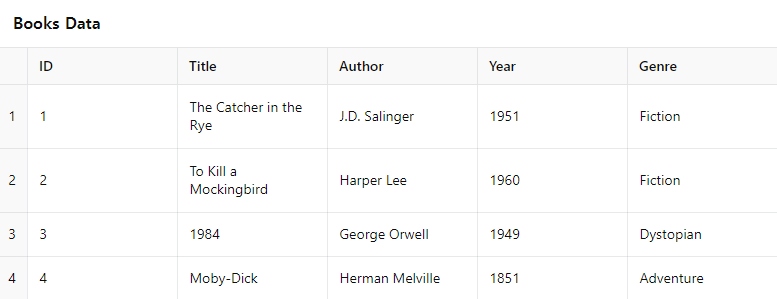

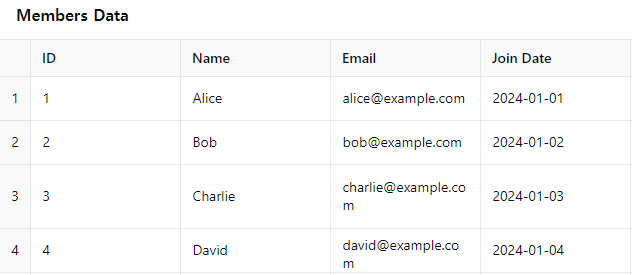

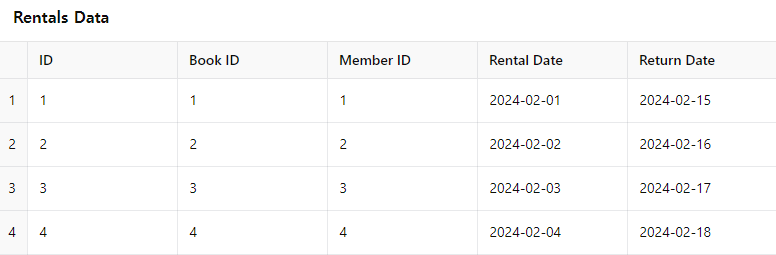

In [ ]:
# ✅ 포인트: LangChain을 이용해 자연어 질문을 SQL로 바꿔주는 흐름을 만들고 실행하는 부분입니다.
# 이 코드는 'Bob은 어떤 책을 빌렸나요?'라는 질문을 SQL로 바꾸고, 그 쿼리를 만들어주는 AI를 설정하는 작업을 합니다.

# OpenAI GPT 모델을 불러오기 위해 langchain_openai에서 ChatOpenAI를 가져옵니다.
from langchain_openai import ChatOpenAI
import os

# ✅ 포인트: OpenAI API를 사용하려면 반드시 API 키를 환경변수로 등록해야 합니다.
# 이 줄은 OpenAI GPT 모델을 사용하기 위한 인증 키를 설정하는 부분입니다.


# 🧠 GPT와 데이터베이스를 연결하는 과정 쉽게 이해하기

이제부터는 GPT 모델이 도서관 데이터베이스와 대화를 하기 위해 **연결 준비를 하는 단계**입니다.  
말하자면, AI에게 "이제부터 너는 이 데이터베이스를 참고해서 대답해야 해!"라고 알려주는 과정입니다.

먼저, `SQLDatabase`라는 도구를 가져옵니다. 이 도구는 LangChain 라이브러리에서 제공하는 유틸리티로,  
우리가 사용하는 **SQLite 데이터베이스 파일(`library.db`)에 접속할 수 있게 도와줍니다.**

이어서 GPT-3.5 모델을 불러오는데, 여기서 두 가지 설정이 핵심입니다:

- `temperature=0.5`: GPT의 창의성(무작위성)을 어느 정도 조절하는 값입니다.  
  0에 가까울수록 정답 위주의 딱딱한 응답, 1에 가까울수록 자유로운 응답을 줍니다.  
  여기서는 중간 정도의 균형을 주는 `0.5`를 선택했습니다.

- `verbose=True`: 코드 실행 과정을 자세히 로그로 확인할 수 있습니다.  
  GPT가 어떤 과정을 거쳐서 응답을 만드는지 추적할 수 있어 디버깅이나 학습에 좋습니다.

마지막 줄은 **이 모델이 사용할 데이터베이스가 무엇인지 명시**하는 부분입니다.  
`"sqlite:///library.db"`는 SQLAlchemy에서 사용하는 경로 표현 방식입니다.  
앞의 `sqlite:///`는 SQLite 데이터베이스라는 뜻이고, `library.db`는 우리가 만든 실제 파일 이름입니다.

쉽게 비유하면 이렇습니다:

> GPT는 지금까지는 '머릿속 백지상태'였는데, 이 코드를 통해 "이제부터 도서관 장부를 참고해서 대답해!"라고 알려주는 것입니다.  
> 즉, AI와 장부를 연결해주는 전선(line)을 꽂아주는 작업이라고 이해하시면 됩니다.

이 과정을 마치면 GPT는 도서관 데이터에 기반해 답변할 수 있는 **지식 기반 비서**가 됩니다.


In [ ]:
# ✅ 포인트: 이 아래는 GPT 모델이 사용할 데이터베이스(SQL)와 연결하는 준비 과정입니다.

# LangChain에서 제공하는 SQLDatabase 유틸리티를 불러옵니다.
# 이 객체는 우리가 사용할 SQLite 데이터베이스 파일(library.db)에 연결해주는 도구입니다.
from langchain.utilities import SQLDatabase

# GPT-3.5-turbo 모델을 설정합니다.
# temperature=0.5는 응답의 창의성(무작위성)을 중간 수준으로 설정한 것입니다.
# verbose=True를 설정하면 내부 진행 과정을 콘솔에서 자세히 볼 수 있습니다.
llm = ChatOpenAI(model='gpt-3.5-turbo', temperature=0.5, verbose=True)

# 포인트: 우리가 앞서 생성한 SQLite 데이터베이스 파일(library.db)에 연결합니다.
# "sqlite:///..." 형태의 문자열은 SQLAlchemy 형식의 URI입니다.
db = SQLDatabase.from_uri("sqlite:///library.db")

# 🤖 자연어 질문을 SQL 쿼리로 자동 변환하는 GPT 체인 만들기

이번 단계는 **GPT 모델에게 "질문을 SQL로 바꿔줘!"라고 알려주는 핵심 기능을 설정하는 부분**입니다.  
우리가 자연어로 던진 질문을, GPT가 적절한 **SQL 문장으로 자동 변환해주는 역할**을 수행하게 됩니다.

우선 `create_sql_query_chain`이라는 함수를 사용해 **SQL 생성 체인**을 만듭니다.  
이 체인은 LangChain에서 제공하는 기능으로,  
GPT 모델이 단순한 텍스트 질문을 **SQL 언어로 자동 해석**하도록 도와주는 연결고리입니다.

이제 체인이 만들어졌으니, 실제 질문을 GPT에게 던져봅니다.  
여기서 `"Bob은 어떤 책을 빌려갔나요?"`라는 질문을 보내면,  
GPT는 이를 데이터베이스에 맞는 SQL 쿼리로 바꿔서 응답해줍니다.

예를 들어, 이런 식의 SQL이 나올 수 있습니다:

```sql
SELECT books.title
FROM books
JOIN rentals ON books.id = rentals.book_id
JOIN members ON members.id = rentals.member_id
WHERE members.name = 'Bob'


In [ ]:
# ✅ 포인트: LangChain에서 SQL 쿼리를 자동 생성하는 체인을 생성합니다.
# create_sql_query_chain 함수는 AI에게 '자연어 → SQL'로 바꿔주는 기능을 제공합니다.
# 즉, 우리가 말로 던진 질문을 AI가 적절한 SQL 문장으로 변환해주는 역할을 합니다.
from langchain.chains import create_sql_query_chain

# GPT 모델과 데이터베이스를 연결하여 SQL 쿼리 생성 체인을 구성합니다.
query_chain = create_sql_query_chain(llm, db)

In [ ]:
# ✅ 포인트: 실제로 자연어 질문을 던지는 부분입니다.
# 여기서 'Bob은 어떤 책을 빌려갔나요?' 라는 질문을 넘기면,
# GPT 모델이 이 질문을 SQL 쿼리로 자동 변환해줍니다.
response = query_chain.invoke({"question": "Bob은 어떤책을 빌려갔나요?"})

# 결과로 생성된 SQL 쿼리를 출력합니다.
# 예시 출력: SELECT books.title FROM ... WHERE members.name = 'Bob'
print(response)

# ✅ 예시로 비유해 설명:
# 이 코드는 마치 '사서에게 질문하면, 사서가 도서 장부에서 직접 SQL 쿼리를 짜서 알려주는 것'과 같습니다.
# 여기서 '사서' 역할을 ChatGPT가 하고, '장부'는 SQLite 데이터베이스입니다.

SELECT b.title
FROM books b
JOIN rentals r ON b.id = r.book_id
JOIN members m ON r.member_id = m.id
WHERE m.name = "Bob"
LIMIT 1;


SELECT b.title: books 테이블에서 책의 제목(title)을 선택합니다.

FROM books b: books 테이블을 b라는 별칭으로 참조합니다.

JOIN rentals r ON b.id = r.book_id: books 테이블과 rentals 테이블을 조인합니다. 이때, books 테이블의 id와 rentals 테이블의 book_id가 일치하는 행들을 연결합니다.

JOIN members m ON r.member_id = m.id: rentals 테이블과 members 테이블을 조인합니다. 이때, rentals 테이블의 member_id와 members 테이블의 id가 일치하는 행들을 연결합니다.

WHERE m.name = 'Alice': members 테이블에서 name이 'Alice'인 회원의 대여 기록을 필터링합니다.

LIMIT 1;: 조회된 결과에서 첫 번째 행만 반환합니다.

# 📊 GPT가 만든 SQL 쿼리를 실제로 실행해 결과 확인하기

이제 마지막 단계입니다.  
앞에서 GPT가 자연어 질문을 분석해서 SQL 쿼리를 만들어줬다면,  
이번에는 그 쿼리를 실제 **데이터베이스에 실행해서 결과를 받아오는 과정**입니다.

먼저 `sqlite3.connect()`를 통해 도서관 데이터베이스 파일(`library.db`)에 다시 연결합니다.  
데이터베이스 파일을 '여는' 작업이라고 생각하시면 됩니다. 이건 마치 엑셀 파일을 다시 불러오는 것과 비슷합니다.

그 다음 `cursor()`를 사용해서 커서를 생성합니다.  
여기서 말하는 커서는 마우스 커서가 아니라, SQL 명령을 보내고 결과를 받아오는 **작업 도구**입니다.

그리고 핵심은 `c.execute(response)`입니다.  
여기서 `response`는 앞서 GPT가 만들어준 SQL 쿼리입니다.  
예를 들어 `"SELECT books.title FROM ... WHERE members.name = 'Bob'"` 같은 문자열이 여기에 들어있죠.

이 SQL을 실제로 실행하게 되면, SQLite 데이터베이스가 내부에서 장부를 검색해서  
"아! Bob이 빌린 책은 이거구나!" 하고 결과를 반환합니다.

마지막으로 `fetchall()`을 사용하면 그 결과를 모두 리스트 형태로 가져옵니다.  
예: `[('1984',), ('To Kill a Mockingbird',)]`

이 코드는 마치 이런 과정입니다:

> AI가 쓴 검색어를 진짜 도서관 전산 시스템에 입력해보고,  
> 그 결과를 직접 출력해서 우리 눈으로 확인하는 작업!

정리하자면, **지금까지의 모든 흐름 중에서 '결과 확인'이라는 마지막 단추를 채우는 작업**입니다.  
이제 우리는 사람처럼 말로 질문하고, AI가 해석해서, 컴퓨터가 직접 답을 찾아오는 전체 흐름을 완성한 것입니다.

In [ ]:
# ✅ 포인트: GPT가 생성한 SQL 쿼리를 실제 SQLite 데이터베이스에 실행해서 결과를 확인하는 단계입니다.

# SQLite 데이터베이스 파일(library.db)에 연결합니다.
# 📌 예시 비유: 장부 파일을 다시 열어 직접 내용을 확인하는 단계입니다.
conn = sqlite3.connect('library.db')

# 데이터베이스 작업을 수행하기 위한 '커서(cursor)' 객체를 생성합니다.
# 📌 커서란? SQL 문장을 실행하고, 실행 결과를 가져올 수 있게 도와주는 도구입니다.
c = conn.cursor()

# ChatGPT가 앞에서 생성한 SQL 쿼리(response 변수에 저장됨)를 실행합니다.
# 📌 중요한 포인트: 여기서 response는 단순 문자열(SQL문)입니다.
# 예를 들어, 'SELECT title FROM books JOIN rentals ... WHERE name = "Bob"' 같은 쿼리가 들어있습니다.
c.execute(response)

# 쿼리 실행 결과를 가져와서 출력합니다.
# fetchall()은 결과를 모두 리스트 형태로 반환해줍니다.
# 📌 예시: [('1984',), ('To Kill a Mockingbird',)] 와 같은 결과가 나올 수 있습니다.
print(c.fetchall())


[('To Kill a Mockingbird',)]


## LangChain과 다양한 툴 연동(Pandas DataFrame 분석을 위한 간단한 에이전트 사용법)



이 코드는 Pandas DataFrame을 다루는 방법과 간단한 분석을 수행하는 방법을 설명합니다. DataFrame은 주로 데이터 분석에서 사용되는 2차원 테이블 구조입니다. 이 코드에서는 LangChain을 사용하여 DataFrame을 다루는 간단한 예제를 제공합니다.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from langchain.chat_models import ChatOpenAI
from langchain_experimental.agents import create_pandas_dataframe_agent
from langchain.agents import AgentType
# CSV 파일 불러오기
data = pd.read_csv('/content/data.csv',encoding='cp949')
# 에이전트 생성
agent = create_pandas_dataframe_agent(
    llm=ChatOpenAI(temperature=0, model="gpt-3.5-turbo-0125"),
    df=data,
    verbose=True,
    agent_type=AgentType.OPENAI_FUNCTIONS,
    allow_dangerous_code=True  # 위험할 수 있는 코드 실행을 허용
)
# 행의 개수 물어보기
agent.invoke("데이터에는 몇 개의 행이 있습니까?")

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 산점도 그리기
agent.invoke("year와 value의 분포를 산점도로 그려주세요")




> Entering new AgentExecutor chain...



Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\n\n# Grouping the data by year and calculating the mean value for each year\ndata_grouped = df.groupby('year')['value'].mean()\n\n# Creating the bar plot\nplt.figure(figsize=(12, 6))\nplt.bar(data_grouped.index, data_grouped.values, color='skyblue')\nplt.xlabel('Year')\nplt.ylabel('Mean Value')\nplt.title('Distribution of Value by Year')\nplt.show()"}`




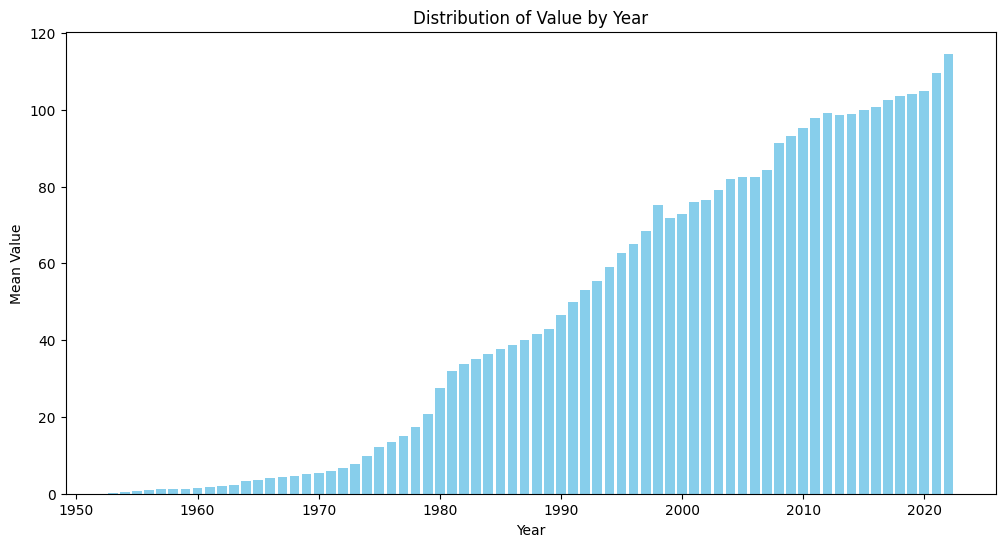

Here is the bar graph showing the distribution of values by year. Each bar represents the mean value for a specific year.

> Finished chain.


{'input': 'year와 value의 분포를 막대그래프로 그려주세요',
 'output': 'Here is the bar graph showing the distribution of values by year. Each bar represents the mean value for a specific year.'}

In [ ]:
# 산점도 그리기
agent.invoke("year와 value의 분포를 막대그래프로 그려주세요")

In [ ]:
data.describe()

,year,value
count,11404.000000,11404.000000
mean,1990.566643,51.401905
std,18.463424,39.322592
min,1953.000000,0.016000
25%,1975.000000,10.107750
50%,1991.000000,50.799000
75%,2007.000000,90.216500
max,2022.000000,166.523000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65534 entries, 0 to 65533
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   item    11404 non-null  object 
 1   year    11404 non-null  float64
 2   value   11404 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.5+ MB
